In [25]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers



In [26]:
import pandas as pd
import numpy as np

In [27]:
training_df = pd.read_csv('train/training.csv')

In [28]:
train_x = training_df.drop('last', axis=1)
train_x.drop(columns=['Unnamed: 0'], inplace=True)

In [29]:
train_y = training_df['last']

In [30]:
train_y = train_y.to_numpy()

In [31]:
train_x = train_x.to_numpy()

In [32]:
test_df = pd.read_csv('test/testing.csv')

In [33]:
test_df.drop(columns=['Unnamed: 0'], inplace=True)

In [34]:
test_y = test_df['last'].to_numpy()

In [35]:
test_x = test_df.drop(columns=['last']).to_numpy()

In [36]:
def convert_to_vec(listy):
    ret_list = np.ndarray((len(listy), 8))
    for i, y in enumerate(listy):
        if y > 0:
            if y <= 0.25:
                ret_list[i] = np.array([0,0,0,1,0,0,0,0])
            elif y <= 0.5:
                ret_list[i] = np.array([0,0,1,0,0,0,0,0])
            elif y < 0.75:
                ret_list[i] = np.array([0,1,0,0,0,0,0,0])
            else:
                ret_list[i] = np.array([1,0,0,0,0,0,0,0])
        else:
            if y >= -0.25:
                ret_list[i] = np.array([0,0,0,0,1,0,0,0])
            elif y >= -0.5:
                ret_list[i] = np.array([0,0,0,0,0,1,0,0])
            elif y > -0.75:
                ret_list[i] = np.array([0,0,0,0,0,0,1,0])
            else:
                ret_list[i] = np.array([0,0,0,0,0,0,0,1])
    return ret_list

In [37]:
test_y = convert_to_vec(test_y)
train_y = convert_to_vec(train_y)

We now have cleaned NP arrays for our training and testing inputs and outputs, so we begin constructing a Keras model.

In [38]:
model = keras.Sequential()
model.add(keras.Input(shape=(20,)))
model.add(layers.Dense(5, name="hidden1")) 
model.add(layers.Dense(8, name="output"))

model.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden1 (Dense)             (None, 5)                 105       
                                                                 
 output (Dense)              (None, 8)                 48        
                                                                 
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________


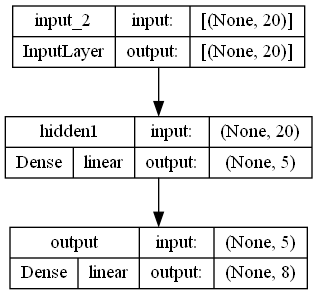

In [39]:
keras.utils.plot_model(
    model,
    to_file="model1.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=True,
)

In [40]:
# reserve ~10% for inter-epoch validation
val_x = train_x[-200:]
val_y = train_y[-200:]
train_x = train_x[:-200]
train_y = train_y[:-200]


In [41]:
model.compile(
    optimizer=keras.optimizers.SGD(), # stoch grad descent
    loss=keras.losses.MeanSquaredError(), # MSE loss function to minimize
    metrics=[keras.metrics.Accuracy()],
)

In [42]:
session = model.fit(
    train_x,
    train_y,
    batch_size=50,
    epochs=100, 
    validation_data=(val_x, val_y),
)

Epoch 1/100
46/46 [==============================] - 0s 4ms/step - loss: 0.1332 - accuracy: 0.0019 - val_loss: 0.1208 - val_accuracy: 0.0000e+00
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.1087 - accuracy: 0.0000e+00 - val_loss: 0.1006 - val_accuracy: 0.0000e+00
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.0926 - accuracy: 0.0000e+00 - val_loss: 0.0865 - val_accuracy: 0.0000e+00
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.0814 - accuracy: 0.0000e+00 - val_loss: 0.0765 - val_accuracy: 0.0000e+00
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.0733 - accuracy: 0.0000e+00 - val_loss: 0.0692 - val_accuracy: 0.0000e+00
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.0675 - accuracy: 0.0000e+00 - val_loss: 0.0636 - val_accuracy: 0.0000e+00
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.0630 - accuracy: 0.0000e+00 - val_l

In [43]:
session.history

{'loss': [0.13322694599628448,
  0.10865171253681183,
  0.0926128625869751,
  0.08138300478458405,
  0.07333316653966904,
  0.0674690529704094,
  0.06303130090236664,
  0.05946342647075653,
  0.05670314282178879,
  0.05452881380915642,
  0.05279618129134178,
  0.05139712244272232,
  0.05030522868037224,
  0.049348343163728714,
  0.048578549176454544,
  0.047901421785354614,
  0.04731564223766327,
  0.04680653661489487,
  0.04636256396770477,
  0.04596694931387901,
  0.045606594532728195,
  0.04529329016804695,
  0.04498877376317978,
  0.04470237344503403,
  0.0444365032017231,
  0.04418446496129036,
  0.043942641466856,
  0.04371146857738495,
  0.04349644109606743,
  0.04327215626835823,
  0.043061863631010056,
  0.04285747930407524,
  0.04265930503606796,
  0.04246652126312256,
  0.042278606444597244,
  0.042094938457012177,
  0.04190656915307045,
  0.04173137992620468,
  0.04155692830681801,
  0.041389595717191696,
  0.04122612625360489,
  0.041062869131565094,
  0.04090452566742897,

In [44]:
results = model.evaluate(test_x, test_y, batch_size=100)
print("test loss, test acc:", results)

17/17 [==============================] - 0s 1ms/step - loss: 0.0254 - accuracy: 0.0000e+00
test loss, test acc: [0.02544104866683483, 0.0]


In [45]:
predictions = model.predict(test_x)
predictions

51/51 [==============================] - 0s 1ms/step


array([[-0.05307972, -0.14497998, -0.02493191, ...,  0.04999133,
        -0.04941657, -0.08710968],
       [-0.12842944,  0.02787983, -0.01477003, ...,  0.08148119,
        -0.04308541, -0.08866346],
       [ 0.00254776,  0.00124564,  0.00693974, ...,  0.01145821,
         0.00204576,  0.00608774],
       ...,
       [ 0.02872169,  0.04641756,  0.0059079 , ...,  0.0156191 ,
         0.01581341,  0.02509421],
       [ 0.00254776,  0.00124564,  0.00693974, ...,  0.01145821,
         0.00204576,  0.00608774],
       [-0.0389227 ,  0.00860297,  0.04912595, ...,  0.02779742,
        -0.03796467, -0.05499049]], dtype=float32)

In [22]:
test_y[700:710]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [46]:
direction_success = 0
for i, pred in enumerate(predictions):
    pred_index = np.argmax(pred)
    test_index = np.argmax(test_y[i])
    if pred_index <= 3  and test_index <= 3:
        direction_success += 1
    elif pred_index > 3 and test_index > 3:
        direction_success += 1

In [47]:
direction_success / len(test_y)

0.9153374233128835

In [48]:
tick_success = 0
for i, pred in enumerate(predictions):
    pred_index = np.argmax(pred)
    test_index = np.argmax(test_y[i])
    if pred_index == test_index:
        tick_success += 1

In [49]:
tick_success / len(test_y)

0.911042944785276